<!-- <h1 align='center'><b>CT5133 Deep Learning - Assignment 2:</b></h1>
<h2 align='center'><b>Image Generation</b></h2>
<h4 align='center'><b>Submitted By: Kalyani Prashant Kawale</b></h4>
<h4 align='center'><b>Student ID: 21237189</b></h4> -->

# **CT5133 Deep Learning - Assignment 2:**
## Unsupervised/self-supervised learning and generating images in Keras
**Submitted By:** Kalyani Prashant Kawale

**Student ID:** 21237189


## Section 1: Image Dataset

Details here

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Colab Notebooks/DeepLearning/Assignment2

/content/drive/MyDrive/Colab Notebooks/DeepLearning/Assignment2


In [ ]:
# Loading libraries
import tensorflow as tf
from tensorflow import keras
from keras import utils
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer, Conv2D, Conv2DTranspose
from keras.models import Sequential, Model

%matplotlib inline

In [ ]:
# Saving image file names in images list
path = './weather'
images = [os.path.join(path, img) for img in os.listdir(path)]

In [ ]:
# Shuffling the images and setting seed for reproducibility
np.random.seed(200)
np.random.shuffle(images)

In [ ]:
image_arr = []
for img in images:
  image_arr.append(cv2.imread(img))


Image 0:


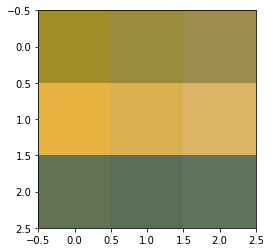


Image 1:


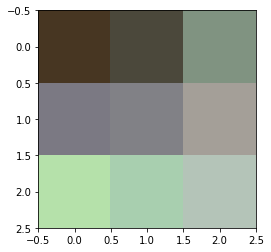


Image 2:


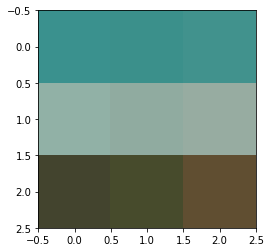


Image 3:


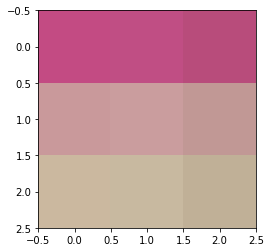


Image 4:


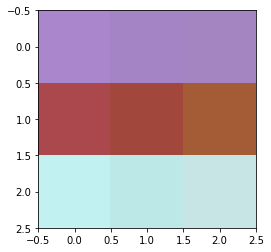


Image 5:


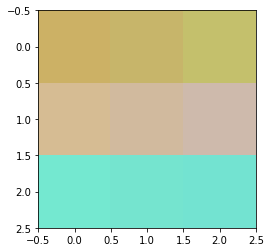


Image 6:


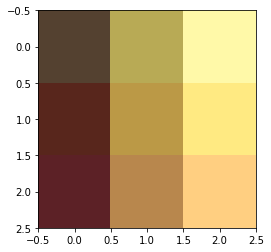


Image 7:


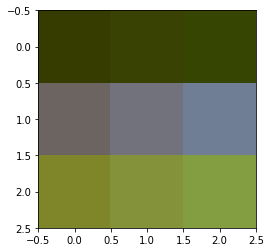


Image 8:


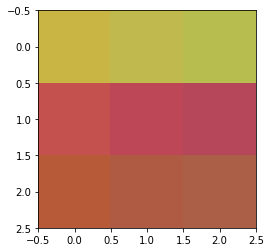

In [ ]:
for index, img in enumerate(image_arr[0:9]):
  print(f'\nImage {index}:')
  image = cv2.resize(img, (3,3))  
  # print(f'\n{image}')
  picture = image.transpose([1, 2, 0])
  plt.imshow(picture)
  plt.show()

In [ ]:
dataset= []
for img in image_arr:
  try:
    dataset.append(cv2.resize(img, (128, 128)))
  except:
    pass

In [ ]:
dataset = np.array(dataset)/255

In [ ]:
dataset = tf.cast(dataset, tf.float32)

In [ ]:
dataset.shape

TensorShape([3172, 128, 128, 3])

## Section 2: Building Auto-Encoder, Variational Auto-Encoder, and Generative Adversarial Network

### Auto-Encoder

In [ ]:
def build_autoencoder(image_dim, latent_dim):
    # The encoder
    # encoder = Sequential()
    # encoder.add(InputLayer(image_dim))
    # encoder.add(Flatten())
    # encoder.add(Dense(latent_dim))

    encoder = Sequential()
    encoder.add(InputLayer(image_dim))
    encoder.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
    encoder.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
    encoder.add(Flatten())
    encoder.add(Dense(latent_dim))

    # The decoder
    # decoder = Sequential()
    # decoder.add(InputLayer((latent_dim,)))
    # decoder.add(Dense(np.prod(image_dim))) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    # decoder.add(Reshape(image_dim))

    decoder = Sequential()
    decoder.add(InputLayer((latent_dim,)))
    decoder.add(Dense(np.prod(image_dim))) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(Reshape(image_dim))
    decoder.add(Conv2DTranspose(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(filters=3, kernel_size=3, padding='same', 
                                activation='sigmoid'))
    return encoder, decoder


In [ ]:
dataset.shape[1:]

TensorShape([128, 128, 3])

In [ ]:
# Configuring the Auto-Encoder
# Same as (128,128,3)
image_dim = (128, 128, 3)
# image_dim = dataset.shape
latent_dim = 100

encoder, decoder = build_autoencoder(image_dim, latent_dim)

original_inputs = Input(image_dim, name="encoder_input")
encode = encoder(original_inputs)
reconstruction = decoder(encode)

autoencoder = Model(original_inputs, reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

In [ ]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 128, 128, 3)]     0         
                                                                 
 sequential_10 (Sequential)  (None, 100)               52433988  
                                                                 
 sequential_11 (Sequential)  (None, 128, 128, 3)       4970307   
                                                                 
Total params: 57,404,295
Trainable params: 57,404,295
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 flatten_5 (Flatten)         (None, 524288)            0         
                                                                 
 dense_10 (Dense)            (None, 100)               52428900  
                                                                 
Total params: 52,433,988
Trainable params: 52,433,988
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoder.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 49152)             4964352   
                                                                 
 reshape_4 (Reshape)         (None, 128, 128, 3)       0         
                                                                 
 conv2d_transpose_13 (Conv2D  (None, 128, 128, 32)     896       
 Transpose)                                                      
                                                                 
 conv2d_transpose_14 (Conv2D  (None, 128, 128, 16)     4624      
 Transpose)                                                      
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 128, 128, 3)      435       
 Transpose)                                                      
                                                     

In [ ]:
history = autoencoder.fit(x=dataset, y=dataset, epochs=5)

Epoch 1/5
100/100 [==============================] - 248s 2s/step - loss: 0.0433
Epoch 2/5
100/100 [==============================] - 245s 2s/step - loss: 0.0229
Epoch 3/5
100/100 [==============================] - 245s 2s/step - loss: 0.0166
Epoch 4/5
100/100 [==============================] - 247s 2s/step - loss: 0.0148
Epoch 5/5
100/100 [==============================] - 246s 2s/step - loss: 0.0137


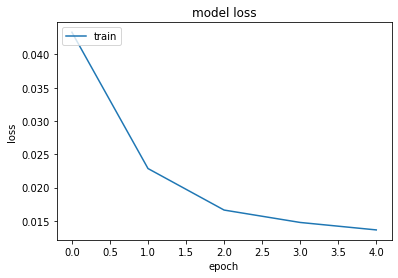

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
def reconstruct_results(generation_model, num_images=5, start=0):  
  sample_images = dataset[start:(start + num_images)]
  reconstructed_imgs = generation_model.predict(sample_images)
  img_len = len(sample_images)
  fig = plt.figure(figsize=(num_images + 10, 5))  
  for i in range(img_len):
    img = sample_images[i]
    sub = fig.add_subplot(2, img_len, i+1)
    sub.axis('off')
    sub.imshow(img)
  
  for i in range(img_len):
    img = reconstructed_imgs[i]
    sub = fig.add_subplot(2, img_len, i+img_len+1)
    sub.axis('off')
    sub.imshow(img)

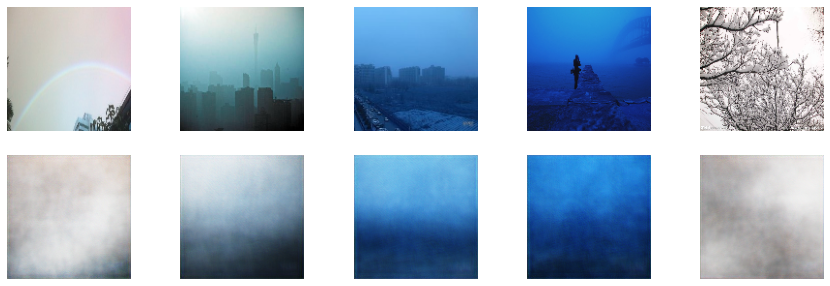

In [ ]:
reconstruct_results(autoencoder, num_images=5, start=9)

In [ ]:
def generate_images(img_generator, latent_dim, num_images=9):
  new_images = img_generator.predict(np.random.normal(0, 1, size=(num_images, latent_dim))) * 255       
  fig = plt.figure(figsize=(15, 10))
  columns = 3
  rows = 3
  for i in range(columns*rows):    
      fig.add_subplot(rows, columns, i+1)
      plt.imshow((new_images[i]).astype(np.uint8))
  plt.show()

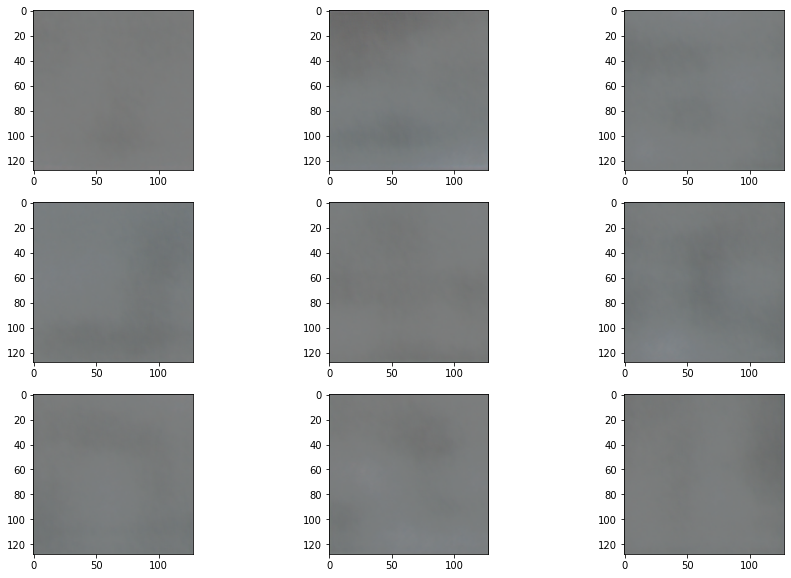

In [ ]:
generate_images(decoder, latent_dim)

## Acknowledgments:

[1] https://www.kaggle.com/jehanbhathena/weather-dataset

[2] Dr. M. Madden. (2021). Load and View CIFAR-10 Data.

[3] Dr. I. Ullah. (2022). ImageProcessing_CV.

[4] Dr. J. McDermott. (2022). Week 7 Lecture Material. Source Code: keras_mnist.py

[5] Dr. J. McDermott. (2022). Week 8 Lecture Material. Source Code: vae.py

[6] Ali Abdelaal. Autoencoders for Image Reconstruction in Python and Keras. Available at: https://stackabuse.com/autoencoders-for-image-reconstruction-in-python-and-keras/

[7] Dhanush Kamath. (2020). Generating New Faces With Variational Autoencoders. Available at: https://www.topbots.com/generating-new-faces-with-variational-autoencoders/

[8] How to display multiple images in one figure correctly? [duplicate]. (2021). Available at: https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly/46616645

[9] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). (2021). Available at: https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa

[10] Muhammad Ardi. (2020). Using Variational Autoencoder (VAE) to Generate New Images. Available at: https://becominghuman.ai/using-variational-autoencoder-vae-to-generate-new-images-14328877e88d
